In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo(Not working from the Yahoo API)
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [ ]:
tech_list = ['AAPL','AMZN']


In [ ]:
AAPL=pd.read_csv('/content/AAPL.csv')
AMZN=pd.read_csv('/content/AMZN.csv')
company_list = [AAPL, AMZN]
company_name = ["APPLE", "AMAZON"]

#for company, com_name in zip(company_list, company_name):
    #company["company_name"] = com_name
#df=pd.read_csv('../input/apple-aapl-historical-stock-data/HistoricalQuotes.csv')
df = pd.concat(company_list, axis=0)
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
243,2022-04-25,2880.459961,2924.429932,2846.129883,2921.479980,2921.479980,3093700
244,2022-04-26,2896.000000,2897.120117,2778.590088,2787.820068,2787.820068,3876500
245,2022-04-27,2803.830078,2838.969971,2715.669922,2763.340088,2763.340088,3566800
246,2022-04-28,2843.560059,2918.750000,2806.000000,2891.929932,2891.929932,5865800
247,2022-04-29,2596.979980,2615.219971,2432.500000,2485.629883,2485.629883,13616500
248,2022-05-02,2448.020020,2493.360107,2367.500000,2490.000000,2490.000000,7439400
249,2022-05-03,2481.070068,2524.409912,2456.500000,2485.070068,2485.070068,3956700
250,2022-05-04,2472.000000,2520.000000,2383.659912,2518.570068,2518.570068,5537300
251,2022-05-05,2460.000000,2469.979980,2301.449951,2328.139893,2328.139893,7219600
252,2022-05-06,2297.000000,2381.010010,2261.629883,2295.449951,2295.449951,6206700


In [ ]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,153.865692,155.626364,152.298656,154.044467,153.523815,8.693295e+07
std,15.525611,15.873473,15.076649,15.475475,15.617332,2.551376e+07
min,123.160004,124.639999,122.250000,122.769997,122.072571,4.100000e+07
25%,144.029999,146.320007,143.509995,145.369995,144.574005,6.902390e+07
50%,151.410004,153.169998,150.100006,151.490005,150.865845,8.227830e+07
75%,167.479996,169.679993,165.500000,166.559998,166.315643,9.989080e+07
max,182.630005,182.940002,179.119995,182.009995,181.511703,1.954327e+08


In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


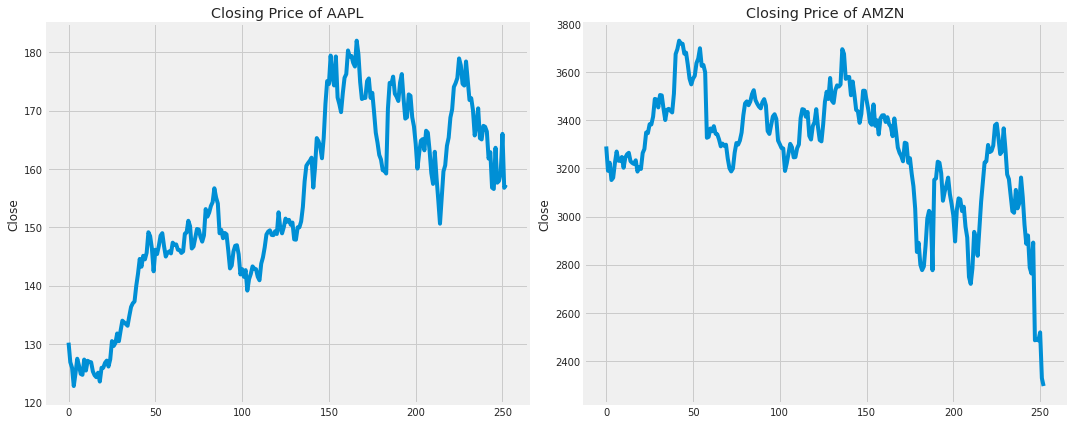

In [ ]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(1, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

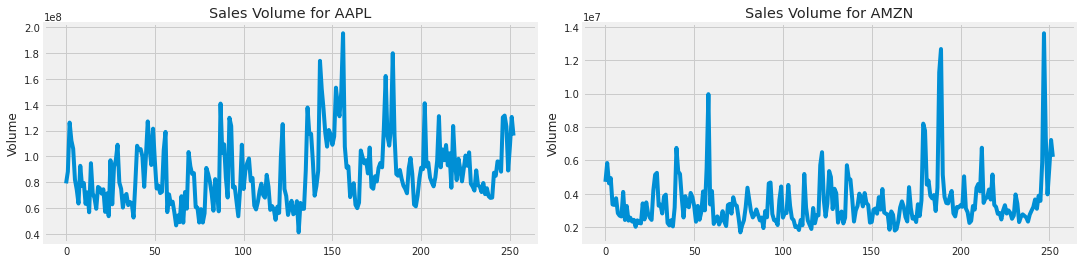

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

In [ ]:
# print(GOOG.columns)

In [ ]:
# df.groupby("company_name").hist(figsize=(12, 12));

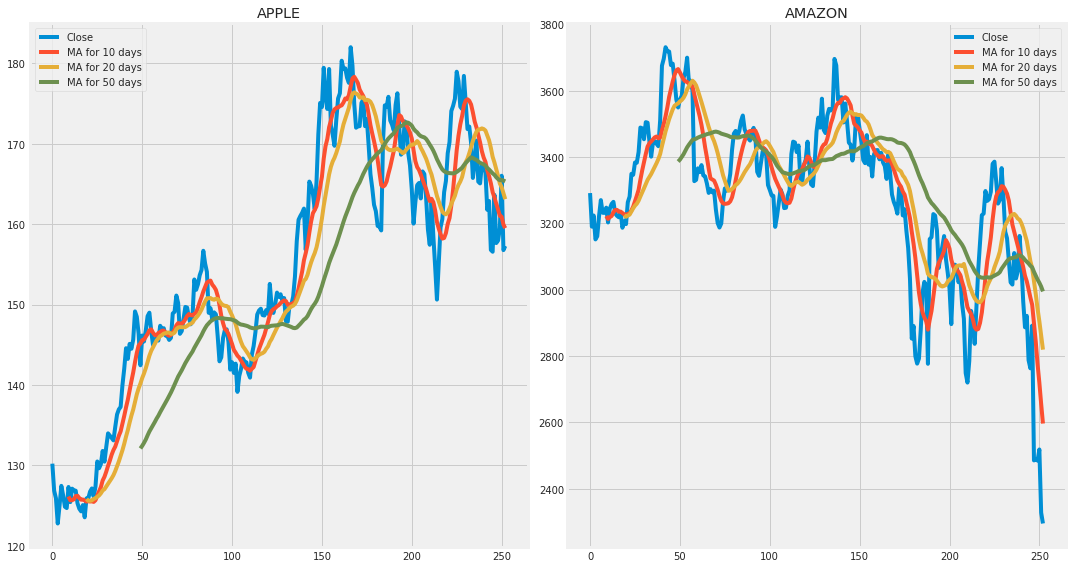

In [ ]:
fig, axes = plt.subplots(ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0])
axes[0].set_title('APPLE')

'''GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')
'''
AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1])
axes[1].set_title('AMAZON')

fig.tight_layout()

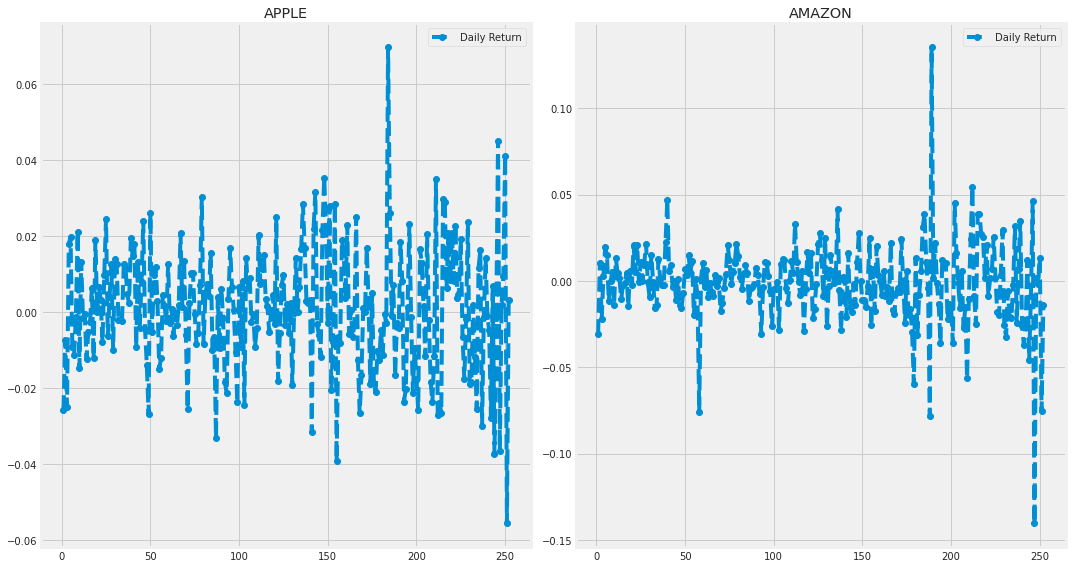

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title('APPLE')
'''
GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')
'''
AMZN['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


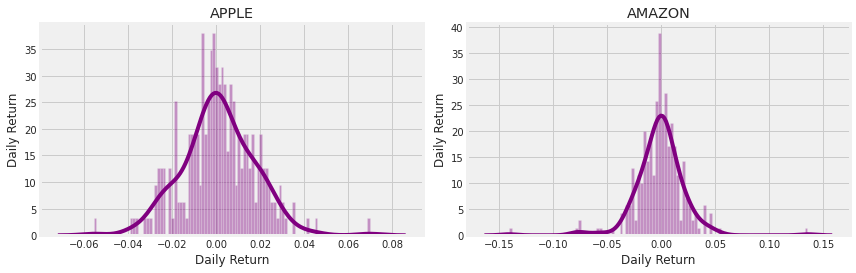

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
#closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

AAPL_Close_price=AAPL.iloc[:,4]
AMZN_Close_price=AMZN.iloc[:,4]
company_Closeprice_list=[ AAPL_Close_price, AMZN_Close_price]
closing_df = pd.concat(company_Closeprice_list, axis=1)

closing_df.columns = ['AAPL','AMZN']
#closing_df.rename(index=str, columns={"Close": "a", "Close": "c"})
# Let's take a quick look
closing_df.head() 

,AAPL,AMZN
0,130.210007,3291.610107
1,126.849998,3190.489990
2,125.910004,3223.909912
3,122.769997,3151.939941
4,124.970001,3161.469971


In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN
0,NaN,NaN
1,-0.025805,-0.030721
2,-0.007410,0.010475
3,-0.024939,-0.022324
4,0.017920,0.003024


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


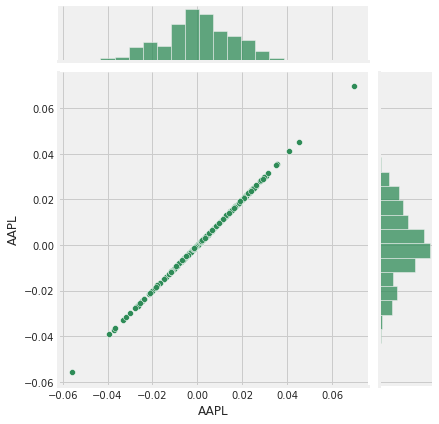

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('AAPL', 'AAPL', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


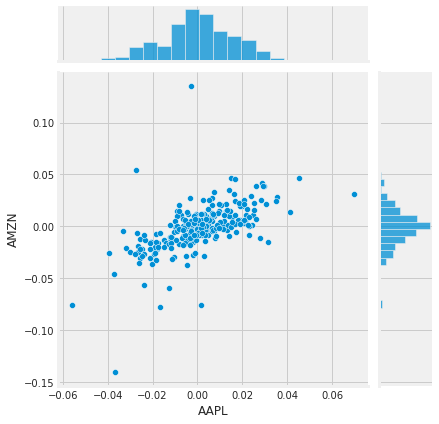

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('AAPL', 'AMZN', tech_rets, kind='scatter')

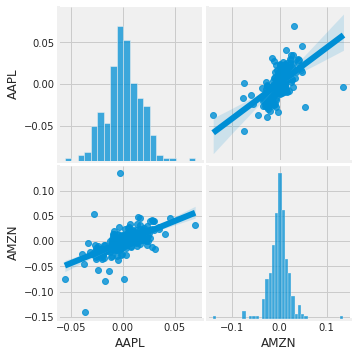

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

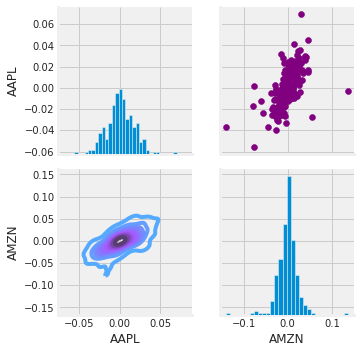

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

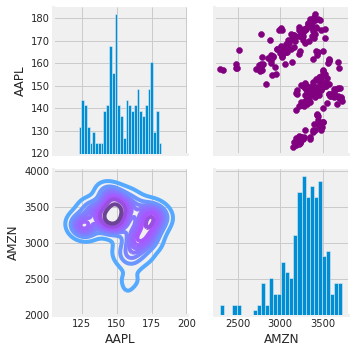

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

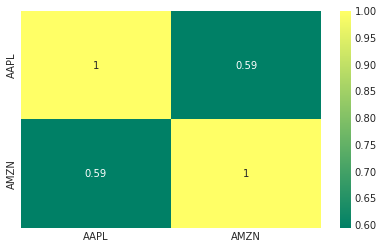

In [ ]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

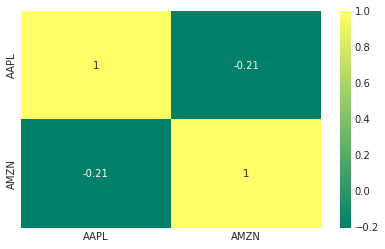

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

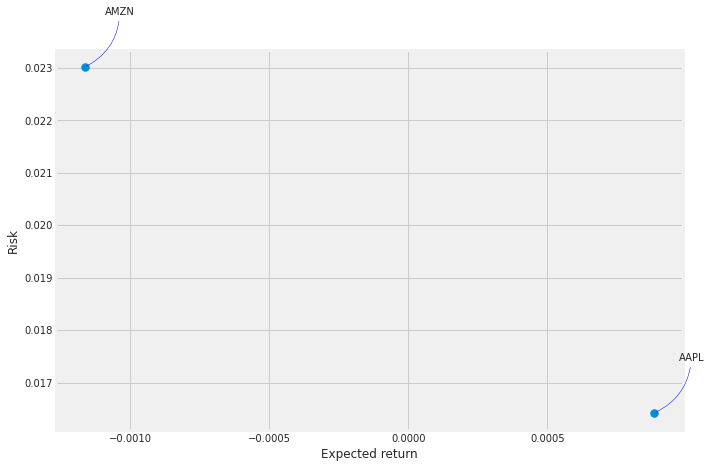

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# Get the stock quote
#df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
0,2021-05-07,130.850006,131.259995,129.479996,130.210007,129.470306,78973300,NaN,NaN,NaN,NaN
1,2021-05-10,129.410004,129.539993,126.809998,126.849998,126.129395,88071200,NaN,NaN,NaN,-0.025805
2,2021-05-11,123.500000,126.269997,122.769997,125.910004,125.194740,126142800,NaN,NaN,NaN,-0.007410
3,2021-05-12,123.400002,124.639999,122.250000,122.769997,122.072571,112172300,NaN,NaN,NaN,-0.024939
4,2021-05-13,124.580002,126.150002,124.260002,124.970001,124.260078,105861300,NaN,NaN,NaN,0.017920
...,...,...,...,...,...,...,...,...,...,...,...
248,2022-05-02,156.710007,158.229996,153.270004,157.960007,157.728256,123055300,161.834000,166.003500,165.618401,0.001966
249,2022-05-03,158.149994,160.710007,156.320007,159.479996,159.246017,88966500,161.042000,165.055499,165.462000,0.009623
250,2022-05-04,159.669998,166.479996,159.259995,166.020004,165.776428,108256500,160.921001,164.603500,165.496000,0.041008
251,2022-05-05,163.850006,164.080002,154.949997,156.770004,156.540009,130525300,159.956001,163.850500,165.430000,-0.055716


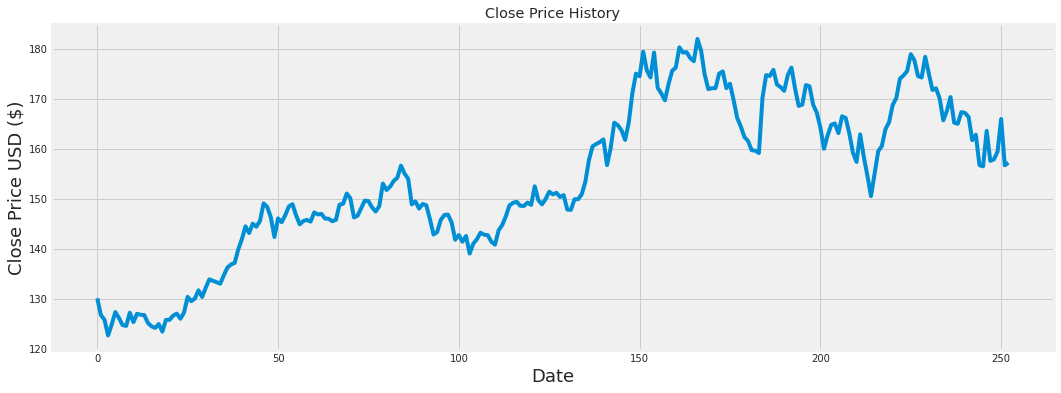

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(AAPL['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

481

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[2.06172136e-03],
       [1.13062015e-03],
       [8.70135861e-04],
       [0.00000000e+00],
       [6.09649079e-04],
       [1.29688750e-03],
       [9.69894498e-04],
       [5.76394722e-04],
       [5.32057796e-04],
       [1.25809200e-03],
       [7.37120650e-04],
       [1.19989833e-03],
       [1.14447689e-03],
       [1.13062015e-03],
       [6.95553466e-04],
       [5.09888502e-04],
       [4.18440752e-04],
       [6.34588392e-04],
       [2.13377898e-04],
       [8.64592221e-04],
       [8.67364180e-04],
       [1.10013775e-03],
       [1.20821143e-03],
       [9.25557573e-04],
       [1.26917651e-03],
       [2.13653875e-03],
       [1.90376490e-03],
       [2.04509100e-03],
       [2.49955557e-03],
       [2.13099954e-03],
       [2.64088583e-03],
       [3.10643324e-03],
       [3.02884196e-03],
       [2.94848121e-03],
       [2.86534657e-03],
       [3.32812425e-03],
       [3.75764978e-03],
       [3.93223218e-03],
       [4.01813629e-03],
       [4.76357032e-03],


In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00206172, 0.00113062, 0.00087014, 0.        , 0.00060965,
       0.00129689, 0.00096989, 0.00057639, 0.00053206, 0.00125809,
       0.00073712, 0.0011999 , 0.00114448, 0.00113062, 0.00069555,
       0.00050989, 0.00041844, 0.00063459, 0.00021338, 0.00086459,
       0.00086736, 0.00110014, 0.00120821, 0.00092556, 0.00126918,
       0.00213654, 0.00190376, 0.00204509, 0.00249956, 0.002131  ,
       0.00264089, 0.00310643, 0.00302884, 0.00294848, 0.00286535,
       0.00332812, 0.00375765, 0.00393223, 0.00401814, 0.00476357,
       0.00533442, 0.00604106, 0.0056725 , 0.0061907 , 0.00602166,
       0.00633757, 0.00731023, 0.00712457, 0.0065454 , 0.00545358,
       0.00647889, 0.00627106, 0.00665902, 0.00714674, 0.0072659 ,
       0.00665071, 0.00615467, 0.00633757, 0.00639853, 0.00630432])]
[0.006814202740979214]

[array([0.00206172, 0.00113062, 0.00087014, 0.        , 0.00060965,
       0.00129689, 0.00096989, 0.00057639, 0.00053206, 0.00125809,
       0.00073712, 0.0011999 , 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

421/421 [==============================] - 24s 50ms/step - loss: 0.0153


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

155.52742123291796

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


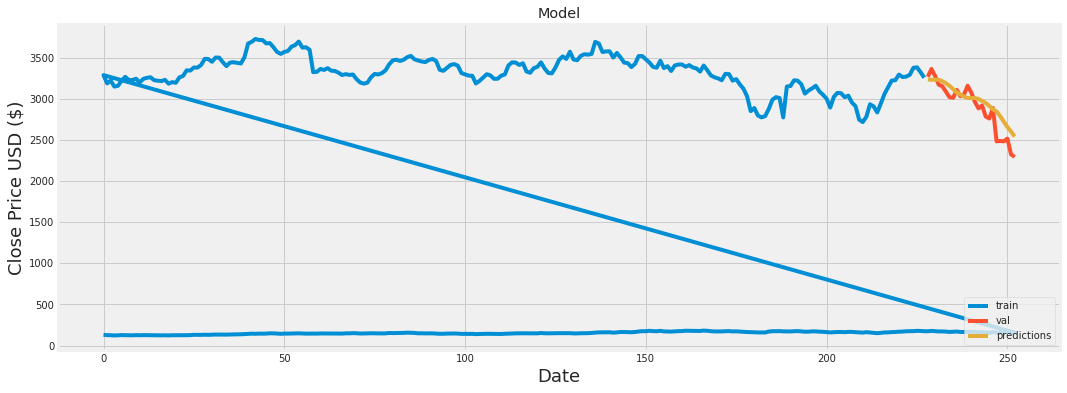

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['train', 'val', 'predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,predictions
228,3271.199951,3238.315186
229,3366.929932,3234.841064
230,3281.100098,3237.515869
231,3175.120117,3234.160645
232,3155.689941,3217.319092
233,3089.209961,3193.201904
234,3022.439941,3160.870850
235,3015.750000,3120.882812
236,3110.820068,3080.540771
237,3034.129883,3054.220703
